# Set Up

## Install libraries needed

In [ ]:
!pip install pandas pyreadstat

In [ ]:
import pandas as pd
import pyreadstat
import matplotlib.pyplot as plt


## Mount Google Drive

In [ ]:
# Needed to get access to data and read it in
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Read in the Sample Data Sets

### Reading in Profile Sample Dataset

In [ ]:
# File path
profile = '/content/drive/MyDrive/Vandy/Second Year/Spring semester/Capstone/Data/sample_profile.dta'

# Read Stata file and convert to pandas DataFrame
profile_df, profile_meta = pyreadstat.read_dta(profile)

profile_df.head()

,id,state_abbr,msa,county,company,naics6,title,title_name,onet,soc5,firm_name_short,city_name_short,title_raw_short,job_start_dt,job_end_dt
0,261ffb6e-f674-3e41-80ab-49a4b7abdda0,CA,41860,6075,NC5f60a4a6-235c-4193-8496-141f874ee801,522110,11.120000,Vice President,11-1011.00,11-1011,JPMorgan Chase & Co.,San Francisco,vice president,2015-02-01,NaN
1,3520a5be-a60e-3a49-a1ff-8bca92d9211e,TX,28660,48027,NCb32a63ce-b0a2-4a9f-a01c-3ca67dc4090a,524210,43.000000,Customer Service Representative,43-4051.00,43-4051,Farmers Insurance Group,Killeen,customer service representative,2015-06-01,NaN
2,8dc02151-189d-34d5-aa70-5884d668fe5e,TX,41700,48029,NC887b87db-85a5-423b-844e-fc083c9aa29a,621610,11.800000,Operations Manager,11-1021.00,11-1021,God and Christ Care LLC,San Antonio,sr. operations manager,2013-09-01,2015-09-01
3,9f5a2494-e555-38cb-b715-588297b854aa,MD,12580,24003,NCbb283b80-a4cd-43f6-ab65-3690aff829b8,541611,19.450001,Principal Scientist,13-2041.00,13-2041,"Tecolote Research, Inc.",Annapolis,principal analyst,2012-09-01,NaN
4,a3763bf5-32f2-3a14-9efd-c94d54a23e6f,DC,47900,11001,NC74858995-2c64-49f0-bb56-ff9cc6046af9,621511,43.000000,Customer Service Representative,43-4051.00,43-4051,Elisa/Act Biotechnologies LLC,Washington,client services & billing representative,2015-08-01,NaN


> **This is the profile data that contains data on people with their most recent job and known location**

> index = line number

> id = how to join on other tables

> state_abbr = state abbreivation

> msa = NOT NEEDED

> county = each county given distinct id, NOT NEEDED

> company = each company given distinct id

> naics6 = NOT NEEDED

> title = each title given distinct id

> title_name = job position name

> onet = for each occupation, quantifies the relevance across different tasks, knowledge, skills, abilities, work activities, work context, work values, and cross-references to other job title codes. For example, it quantifies the importance of Design knowledge, peripheral vision ability, and critical thinking skills for a Marine Engineer. This is a occupation classifier and how to merge in skillsets. For each title, name, and onet they can be the same. For example, a VP will have this title number and specific onet code. This is likely but not always the case.

> soc5 = NOT NEEDED

> firm_name_short = name of company abbreviated

> city_name_short = city

> title_raw_short = job position abbreviated

> job_start_dt = when person started their job

> job_end_dt = End date is missing for 40% of the sample which can just mean they left the firm or started a new job position at the firm.


In [ ]:
profile_meta

### Read in Education Sample Dataset

In [ ]:
# Read in other dataset, file path
education = '/content/drive/MyDrive/Vandy/Second Year/Spring semester/Capstone/Data/sample_education.dta'

# Read Stata file and convert to pandas DataFrame
education_df, education_meta = pyreadstat.read_dta(education)

education_df.head()

,id,order_id,school_ipeds_unitid,school_name_norm,school_city,school_state,cip_name,level_name,grad_year,field_raw_short
0,69864f94-334d-3765-92a6-02662d361c5c,0,118772,Merritt College,Oakland,CA,"Business Administration and Management, General",Associate Degree,2016,business administration and management general
1,68a03d4d-4b0a-34ab-96e7-e4d8120103f4,1,129020,University of Connecticut,Storrs,CT,"Human Development and Family Studies, General",Bachelor's Degree,2016,
2,688fff48-61b2-3b9b-93c2-567209eed0da,0,195003,Rochester Institute of Technology,Rochester,NY,"Business Administration and Management, General",,1992,business administration and management general
3,6a242e63-883f-3256-aefb-dde80c687131,1,193900,New York University Stern School of Business,New York,NY,"Business Administration and Management, General",Master's Degree,NaN,
4,68be184e-80eb-3b5b-996a-6c733802abf5,0,218830,Spartanburg Community College,Spartanburg,SC,,,1997,


**This is the education data that contains data on the profile's education. Join based on id column. Might not use this dataset much. Tells us where the profile went to school.**

> index = line number

> id = unique identifier, join to other tables based on this

> order_id = NOT NEEDED

> school_ipeds_unitid  = unique indentifier for each school

> school_name_norm = school name

> school_city = school city

> school_state = school state

> cip_name =

> level_name = completed degree title, ie masters, associates, bachelors, etc

> grad_year = year graduated

> field_raw_short =

In [ ]:
education_meta

### Read in Employment Sample Dataset

In [ ]:
# Read in other dataset, file path
employment = '/content/drive/MyDrive/Vandy/Second Year/Spring semester/Capstone/Data/sample_employment.dta'

# Read Stata file and convert to pandas DataFrame
employment_df, employment_meta = pyreadstat.read_dta(employment)

employment_df.head()

,id,order_id,onet,title,company_id,company_naics,title_raw_short,firm_name_short,start_dt,end_dt
0,13b7f6c5-2e87-3490-9dcf-a5851d8011fa,8,41-9011.00,41.7,NCd9436c3f-6ed6-4d5b-bb94-c9feaf8a1dda,452111,brand ambassador,Target Corporation,2011-08-01,2012-08-01
1,13c9da83-64fb-3c6f-8bba-70f567be7070,8,37-2011.00,37.1,NC763393b7-5829-4c1e-ae7c-8f3c32374122,561790,janitor,Janette's Janitorial & Cleaning Service,2003-10-14,2005-07-14
2,14583ff6-2f59-31bc-843b-e0f94aed2867,8,41-4012.00,41.8,NCa05b1ec7-0d1c-4a24-83f5-1175633df5b2,339112,account executive,Applied Medical Resources Corporation,1996-01-14,1997-01-14
3,13b80e46-3d35-373d-bc5a-8592273af3e6,8,27-3022.00,27.92,NC0abe9919-fb28-41c1-b5bc-f8e2f12ca41a,236116,intern news reporter,Appalachian Inc,2013-09-01,2013-12-01
4,13436f93-4e05-3938-b21f-6d4c13e2f367,8,,,NC1c863fcc-1dfb-4c33-be24-147d88b5dd32,541512,sw analyst (automotive embedded systems,Datamatics Inc.,2010-01-01,2011-01-01


**This is the employment data about the profile.**

> index = line number

> id = how to join to other tables

> order_id = NOT NEEDED

> onet = same as above

> title = unique identifier for each title

> company_id = unique identifier for each company

> company_naics = NOT NEEDED

> title_raw_short = job position title abbreviated

> firm_name_short = company name abbreviated

> start_dt = when person started employment

> end_dt = when person ended employmenty


> Eployment start date and end date match the start and end dates in profile dataset.

In [ ]:
employment_meta

### New Data: Employment histories for all workers who ever worked at Deloitte

In [ ]:
# File path for new data set
deloitte_employee_data = '/content/drive/MyDrive/Vandy/Second Year/Spring semester/Capstone/Data/Sam_Deloitte_Sample.dta'

# Read Stata file and convert to pandas DataFrame
deloitte_employee_df, deloitte_employee_meta = pyreadstat.read_dta(deloitte_employee_data)

deloitte_employee_df.head()

,id,onet,Title1,Title2,start_dt,end_dt,numeric_company_id,deloitte_ind,deloitte_ever
0,36.0,13-1111.00,Business Analyst (Computer and Mathematical),Technology Analyst,2018-08-01,NaN,9797218,1,1
1,36.0,99-1111.00,Solutions Engineer,Intern,2017-06-01,2017-08-01,6980886,0,1
2,36.0,41-9011.00,Other,Student Ambassador,2016-08-01,2017-05-01,6496747,0,1
3,36.0,99-1111.00,Consulting Operations,Intern,2016-06-01,2016-08-01,3327008,0,1
4,36.0,43-1011.00,Proposal Coordinator,Technical Coordinator,2015-05-01,2015-08-01,2511218,0,1


 **Sample data from Dropbox Transfer (pass: DSICapSam). This will include the employment histories for all workers who ever worked at Deloitte. There seem to be several different company identifiers which are capturing different subsidiaries of Deloitte, so I created an indicator for those jobs that I identified as Deloitte.**

> id =

> onet =

> Title1 AND Title2 = The two job titles should be similar and they're cleaned by Emsi to capture what the person wrote and their responsibilities. I kept both, just to see if there was any additional information to capture the two classifications (consult/audit).

> start_dt =

> end_dt =

> numeric_company_id =

> deloitte_ind = The indicator for whether the company is "Deloitte" is deloitte_ind. I kept the other observations because it allows us to understand whether the individual has work experience in audit or consulting prior to or during their tenure with Deloitte.

> deloitte_ever = Deloitte_ever is whether the person ever worked at Deloitte, but you can drop that since I've already isolated that set (they should all equal 1)

https://www.onetcenter.org/database.html#individual-files: Website with a lot of different data sets, including Occupation Titles. Should help with interrupting ONET values and classifying job titles as either auditing, consulting, or other.

# Exploratory Analysis


## How much data do we have?

In [ ]:
# Get the number of rows and columns
num_rows, num_columns = deloitte_employee_df.shape

# Print the results
print(f"Number of Rows: {num_rows}")
print(f"Number of Columns: {num_columns}")

Number of Rows: 2126009
Number of Columns: 9


Have about 2 million rows of data on employees who have ever worked at Deloitte.

## Of that data, how many worked at Deloitte or its subsidiaries?

1 = Deloitte

0 = Deloitte subsidaries

In [ ]:
# Define column of interest
column_name = 'deloitte_ind'

# Count the occurrences of 0's and 1's in the specified column
value_counts = deloitte_employee_df[column_name].value_counts()

# Print the results
print(f"Count of 0's: {value_counts.get(0, 0)}")
print(f"Count of 1's: {value_counts.get(1, 0)}")

Count of 0's: 1712636
Count of 1's: 413373


About 1 million people from the dataset have worked for Deloitte subsidaries and 400 thousand worked for Deloitte.

## How many unique titles?

In [ ]:
# Define column of interest
title_column = 'Title1'

# Count the number of unique titles
num_unique_titles = deloitte_employee_df[title_column].nunique()

# List all unique titles
unique_titles = deloitte_employee_df[title_column].unique()

# Print the results
print(f"Number of unique titles: {num_unique_titles}")
print("List of unique titles:")
print(unique_titles)

Number of unique titles: 5149
List of unique titles:
['Business Analyst (Computer and Mathematical)' 'Solutions Engineer'
 'Other' ... 'Patrol Deputy' 'Dozer Operator' 'Electronic Inspector']


There is about 5 thousand unique job titles that need to be classified as audit, consulting, or other. Now look at other title column, Title2.

In [ ]:
# Define column of interest
title_column = 'Title2'

# Count the number of unique titles
num_unique_titles = deloitte_employee_df[title_column].nunique()

# List all unique titles
unique_titles = deloitte_employee_df[title_column].unique()

# Print the results
print(f"Number of unique titles: {num_unique_titles}")
print("List of unique titles:")
print(unique_titles)

Number of unique titles: 48011
List of unique titles:
['Technology Analyst' 'Intern' 'Student Ambassador' ...
 'Inside Sales/Warehouse Manager' 'Product Integration Engineer'
 'Data Acquisition Engineer']


Title2 column has more unique titles, with a distinct count of about 48 thousand job titles.

## How many unique ONET values?

In [ ]:
# Define column of interest
onet_column = 'onet'

# Count the number of unique onet values
num_unique_onet = deloitte_employee_df[onet_column].nunique()

# List all onet values
#unique_onet = deloitte_employee_df[onet_column].unique()

# Print the results
print(f"Number of unique ONET values: {num_unique_onet}")
#print("List of ONET values:")
#print(unique_onet)

Number of unique ONET values: 992


There is almost 1 thousand unique ONET values that need to be classified as either audit, consulting, or other.

# Classification

Now need to classify Deloitte employees job history as either audit, consulting, or other focused. To do this need to look at their job titles and ONET values. Create a new column that classifies them as one of the three: audit, consulting, or other.

In [ ]:
# Testing to see how job titles formatted for a specific ONET value

# Define column of interest
column_name = 'onet'

# Test ONET value
target_value = '13-1111.00'

# Using loc to filter the df based on the condition
specific_record = deloitte_employee_df.loc[deloitte_employee_df[column_name] == target_value]

# Convert the result to a new df
result_df = pd.DataFrame(specific_record)

# print results
result_df


,id,onet,Title1,Title2,start_dt,end_dt,numeric_company_id,deloitte_ind,deloitte_ever
0,3.600000e+01,13-1111.00,Business Analyst (Computer and Mathematical),Technology Analyst,2018-08-01,NaN,9797218,1,1
27,2.964000e+03,13-1111.00,Business Advisor,\N,2015-08-01,2017-08-01,9797218,1,1
28,2.964000e+03,13-1111.00,Business Advisor,Advisor,2014-01-01,2015-08-01,9797218,1,1
57,4.327000e+03,13-1111.00,Senior Consultant,Consultant,2016-09-01,2017-01-01,8086022,0,1
58,4.327000e+03,13-1111.00,Task Leader (Transportation and Material Moving),Business Analyst Consultant,2015-11-01,2016-08-01,9972468,0,1
...,...,...,...,...,...,...,...,...,...
2125947,1.374304e+14,13-1111.00,Senior Consultant,Consultant,2014-06-01,2015-03-01,9797218,1,1
2125955,1.374304e+14,13-1111.00,Senior Consultant,Consultant,2017-04-01,NaN,2366626,0,1
2125978,1.374304e+14,13-1111.00,Building Consultant,Consultant,2016-08-01,2018-08-01,9797218,1,1
2125981,1.374304e+14,13-1111.00,Business Analyst (Computer and Mathematical),Technology Analyst,2018-02-01,NaN,9797218,1,1


## Copy DF

In [ ]:
# Copy over entire df to make edits. Want to keep the original df the same.
copied_deloitte_employee_df = deloitte_employee_df.copy()

# List of columns to drop
columns_to_drop = ['numeric_company_id', 'deloitte_ever']

# Drop the specified columns
copied_deloitte_employee_df = copied_deloitte_employee_df.drop(columns=columns_to_drop)

# View the new df
copied_deloitte_employee_df

,id,onet,Title1,Title2,start_dt,end_dt,deloitte_ind
0,3.600000e+01,13-1111.00,Business Analyst (Computer and Mathematical),Technology Analyst,2018-08-01,NaN,1
1,3.600000e+01,99-1111.00,Solutions Engineer,Intern,2017-06-01,2017-08-01,0
2,3.600000e+01,41-9011.00,Other,Student Ambassador,2016-08-01,2017-05-01,0
3,3.600000e+01,99-1111.00,Consulting Operations,Intern,2016-06-01,2016-08-01,0
4,3.600000e+01,43-1011.00,Proposal Coordinator,Technical Coordinator,2015-05-01,2015-08-01,0
...,...,...,...,...,...,...,...
2126004,1.374304e+14,11-3031.01,Planning Director,Director of Financial Planning,2007-04-01,2010-02-01,0
2126005,1.374304e+14,13-1111.00,Systems Manager,Managing Consultant,2005-06-01,2007-04-01,0
2126006,1.374304e+14,11-2021.00,Product Manager (Management),Product Manager,2002-08-01,2003-08-01,0
2126007,1.374304e+14,13-1199.00,Senior Consultant,Consultant,1999-08-01,2002-08-01,0


## Function to categorize groups

In [ ]:
# Creating a function to read in the df and create a Group column that identifies the job as either audit, consulting, or other.
def categorize_group(row):
    title1 = str(row['Title1']).lower()
    title2 = str(row['Title2']).lower()

    if 'consult' in title1 or 'consult' in title2 or 'analyst' in title1 or 'analyst' in title2 or 'market' in title1 or 'market' in title2 or 'solution' in title1 or 'solution' in title2 or 'analytics' in title1 or 'analytics' in title2:
        return 'Consulting' # added solution bc of the title Solutions Engineer, added market bc of the title marketing
    elif 'audit' in title1 or 'audit' in title2:
        return 'Auditing'
    #elif 'quality engineer' in title1 or 'quality engineer' in title2 or 'cyber security Engineer' in title1 or 'cyber security engineer' in title2 or 'test automation engineer' in title1 or 'test automation engineer' in title2 or 'software engineer' in title1 or 'software engineer' in title2 or 'mobile software engineer' in title1 or 'mobile software engineer' in title2 or 'electrical test engineer' in title1 or 'electrical test engineer' in title2 or 'engineering fellow' in title1 or 'engineering fellow' in title2 or 'systems engineer' in title1 or 'systems engineer' in title2 or 'oil and gas engineer' in title1 or 'oil and gas engineer' in title2:
        #return 'Engineering'
    elif 'engineer' in title1 or 'engineer' in title2:
      return 'Engineering' # Created engineering group to help decrease the amt of data in the Other group. These rows will be dropped later on.
    elif 'ambassador' in title1 or 'ambassador' in title2 or 'other' in title1 or 'other' in title2 or 'coordinator' in title1 or 'coordinator' in title2 or 'business intelligence' in title1 or 'business intelligence' in title2 or 'intern' in title1 or 'intern' in title2 or 'assistant' in title1 or 'assistant' in title2:
      return 'NA'
    elif 'manager' in title1 or 'manager' in title2:
      return 'Manager'
    else:
        return 'Other'

# Apply the categorize_group function to create the 'Group' column
copied_deloitte_employee_df['Group'] = copied_deloitte_employee_df.apply(categorize_group, axis=1)

# Print the resulting df
copied_deloitte_employee_df

,id,onet,Title1,Title2,start_dt,end_dt,deloitte_ind,Group
0,3.600000e+01,13-1111.00,Business Analyst (Computer and Mathematical),Technology Analyst,2018-08-01,NaN,1,Consulting
1,3.600000e+01,99-1111.00,Solutions Engineer,Intern,2017-06-01,2017-08-01,0,Consulting
2,3.600000e+01,41-9011.00,Other,Student Ambassador,2016-08-01,2017-05-01,0,NA
3,3.600000e+01,99-1111.00,Consulting Operations,Intern,2016-06-01,2016-08-01,0,Consulting
4,3.600000e+01,43-1011.00,Proposal Coordinator,Technical Coordinator,2015-05-01,2015-08-01,0,NA
...,...,...,...,...,...,...,...,...
2126004,1.374304e+14,11-3031.01,Planning Director,Director of Financial Planning,2007-04-01,2010-02-01,0,Other
2126005,1.374304e+14,13-1111.00,Systems Manager,Managing Consultant,2005-06-01,2007-04-01,0,Consulting
2126006,1.374304e+14,11-2021.00,Product Manager (Management),Product Manager,2002-08-01,2003-08-01,0,Manager
2126007,1.374304e+14,13-1199.00,Senior Consultant,Consultant,1999-08-01,2002-08-01,0,Consulting


Let's see how many job titles were categoried.

In [ ]:
# Count occurrences of each group
group_counts = copied_deloitte_employee_df['Group'].value_counts()

# Print the result
print("Count of each group:")
print(group_counts)

Count of each group:
Other          754194
Consulting     533135
Manager        354938
NA             299692
Auditing        92899
Engineering     91151
Name: Group, dtype: int64


We have a lot of job titles categorized as Other so need to refine my categorize_group function. Let's look specifically at the job titles that were categorized as Other.

## Test & Refine Function


In [ ]:
# Column of interest
column_name = 'Group'

# Want to see rows that were categorized as 'Other'
target_value = 'Other'

# Using loc to filter the df based on the condition
other_group_records = copied_deloitte_employee_df.loc[copied_deloitte_employee_df[column_name] == target_value]

# Convert the result to a new df
other_group_df = pd.DataFrame(other_group_records)

# Print results
other_group_df

,id,onet,Title1,Title2,start_dt,end_dt,deloitte_ind,Group
9,1.536000e+03,11-3031.01,Chief Financial Officer (CFO),Chief Financial Officer,2020-02-01,NaN,0,Other
11,1.536000e+03,11-3031.02,Vice President (VP) of Finance,Executive Vice President,2002-01-01,2008-08-01,0,Other
21,2.094000e+03,11-1021.00,President,\N,2016-09-01,NaN,0,Other
22,2.094000e+03,11-3031.01,Director of Finance,Director of Finance,NaN,NaN,0,Other
25,2.964000e+03,27-2022.00,Executive Producer,Executive Coach,2019-01-01,NaN,0,Other
...,...,...,...,...,...,...,...,...
2125987,1.374304e+14,25-1199.00,Adjunct Professor,Adjunct Professor,2018-07-01,NaN,0,Other
2125988,1.374304e+14,25-3099.00,Instructor,Drum Instructor,2019-07-01,2019-08-01,0,Other
2125990,1.374304e+14,51-7011.00,Lecturer,Guest Lecturer,2017-09-01,2018-12-01,0,Other
2126003,1.374304e+14,11-2021.00,Director of Product Development,Team Lead,2010-02-01,2010-07-01,0,Other


Continue refining the categorize_group function above with additional job titles.

In [ ]:
# Want to see what kind of job titles include the word 'engineer'. This will help me categorize.
# In the end, I created a new Group called 'Engineering' so I can decrease the amt of rows in the 'Other' group.
# These rows will be dropped later.

# Filter records containing the word 'Engineer' in either 'Title1' or 'Title2'
engineer_records = copied_deloitte_employee_df[(copied_deloitte_employee_df['Title1'].str.contains('engineer', case=False) |
                                                copied_deloitte_employee_df['Title2'].str.contains('engineer', case=False)) &
                                                 (copied_deloitte_employee_df['Group'] == 'Other')
                                                 ]
# Print the results
engineer_records

,id,onet,Title1,Title2,start_dt,end_dt,deloitte_ind,Group


This proves that all job titles that contain the word engineering were categorized as Engineer. This is returning blank bc titles with the word 'Engineer' were categorized at 'Engineering' Group. This is a result of me going through the ONET values with the occupation data set (found here: https://www.onetcenter.org/database.html#individual-files ) and job titles and deciding these jobs needed its own group.

In [ ]:
# Let's look at all the job titles for the ONET value 43-1011.00. The job description in the Occupational Data set is as follows:
# "Directly supervise and coordinate the activities of clerical and administrative support workers". This is niether audit or consulting,
# this is more related to managerial or supervisory roles. I want to look at the job titles of these ONET values so I can edit the categorize_group function.

# Column of interest
column_name = 'onet'
target_value = '43-1011.00'

# Using loc to filter the df based on the condition
manager_records_43 = copied_deloitte_employee_df.loc[copied_deloitte_employee_df[column_name] == target_value]

# Convert the result to a new df
manager_df_43 = pd.DataFrame(manager_records_43)

# Print results
manager_df_43

,id,onet,Title1,Title2,start_dt,end_dt,deloitte_ind,Group
4,3.600000e+01,43-1011.00,Proposal Coordinator,Technical Coordinator,2015-05-01,2015-08-01,0,NA
254,8.589937e+09,43-1011.00,Client Services Manager,Client Services Manager,NaN,NaN,0,Manager
407,1.717987e+10,43-1011.00,Staff Scientist,\N,2016-08-01,2018-05-01,0,Other
624,2.576981e+10,43-1011.00,Safety Inspector (Transportation and Material ...,\N,2009-08-01,NaN,0,Other
633,2.576981e+10,43-1011.00,Office Manager (Office and Administrative Supp...,Administrative Office Manager,1999-11-01,2003-11-01,0,Manager
...,...,...,...,...,...,...,...,...
2125811,1.374046e+14,43-1011.00,Practice Leader,Manager/Leader,2009-05-01,2013-07-01,0,Manager
2125913,1.374218e+14,43-1011.00,Administrative Director,\N,2008-05-01,NaN,0,Other
2125919,1.374218e+14,43-1011.00,Customer Service Assistant,Community and Economic Development Specialist,1996-01-01,2001-01-01,0,NA
2125965,1.374304e+14,43-1011.00,Office Manager (Office and Administrative Supp...,Administrative Office Manager,2014-05-01,2016-02-29,0,Manager


In [ ]:
# How many distinct/unique titles for ONET value 43-1011.00 and list them. This will help me edit the categorize group function above.

# Define column of interest
title_column = 'Title1'

# Count the number of unique titles for this onet value
num_unique_titles = manager_df_43[title_column].nunique()

# List all titles for this onet value
unique_title = manager_df_43[title_column].unique()

# Print the results
print(f"Number of unique titles for ONET value 43-1011.00: {num_unique_titles}")
print("List of the titles for ONET value 43-1011.00:")
print(unique_title)

Number of unique titles for ONET value 43-1011.00: 2148
List of the titles for ONET value 43-1011.00:
['Proposal Coordinator' 'Client Services Manager' 'Staff Scientist' ...
 'Tool Maker' 'Racer' 'Animator']


In [ ]:
# What job titles have the word 'coordinator' in it?
coordinator_records = copied_deloitte_employee_df[(copied_deloitte_employee_df['Title1'].str.contains('coordinator', case=False) |
                                                copied_deloitte_employee_df['Title2'].str.contains('coordinator', case=False)) &
                                                 (copied_deloitte_employee_df['Group'] == 'Other')
                                                 ]
# Print the results
coordinator_records

,id,onet,Title1,Title2,start_dt,end_dt,deloitte_ind,Group


In [ ]:
# What are the distinct ONET values for the coordinator records?

# Define column of interest
onet_column = 'onet'

# Count the number of unique onet values
num_unique_onet = coordinator_records[onet_column].nunique()

# List all onet values
unique_onet = coordinator_records[onet_column].unique()

# Print the results
print(f"Number of unique ONET values for coordinator records: {num_unique_onet}")
print("List of ONET values for coordinator records:")
print(unique_onet)

# Went through some of these ONET values and conclude these are niether audit or consulting focused.
# Going back to edit categorize group function

Number of unique ONET values for coordinator records: 0
List of ONET values for coordinator records:
[]


In [ ]:
# Now let's look at any job title that contains the word 'manager'
manager_records = copied_deloitte_employee_df[(copied_deloitte_employee_df['Title1'].str.contains('manager', case=False) |
                                                copied_deloitte_employee_df['Title2'].str.contains('manager', case=False)) &
                                                 (copied_deloitte_employee_df['Group'] == 'Other')
                                                 ]
# Print the results
manager_records

,id,onet,Title1,Title2,start_dt,end_dt,deloitte_ind,Group


In [ ]:
# List all ONET values for the manager records

# Define column of interest
onet_column = 'onet'

# Count the number of unique onet values
num_unique_onet = manager_records[onet_column].nunique()

# List all onet values
unique_onet = manager_records[onet_column].unique()

# Print the results
print(f"Number of unique ONET values for manager records: {num_unique_onet}")
print("List of ONET values for manager records:")
print(unique_onet)

Number of unique ONET values for manager records: 0
List of ONET values for manager records:
[]


In [ ]:
# Let's look at all titles with the word 'business intelligence'
bi_records = copied_deloitte_employee_df[(copied_deloitte_employee_df['Title1'].str.contains('business intelligence', case=False) |
                                                copied_deloitte_employee_df['Title2'].str.contains('business intelligence', case=False)) &
                                                 (copied_deloitte_employee_df['Group'] == 'Other')
                                                 ]
# Print the results
bi_records

,id,onet,Title1,Title2,start_dt,end_dt,deloitte_ind,Group


In [ ]:
# List all ONET values for the BI records

# Define column of interest
onet_column = 'onet'

# Count the number of unique onet values
num_unique_onet = bi_records[onet_column].nunique()

# List all onet values
unique_onet = bi_records[onet_column].unique()

# Print the results
print(f"Number of unique ONET values for BI records: {num_unique_onet}")
print("List of ONET values for BI records:")
print(unique_onet)

Number of unique ONET values for BI records: 0
List of ONET values for BI records:
[]


In [ ]:
# Let's look at specific ONET value 33-3021.06 from the BI records

# Column of interest
column_name = 'onet'
target_value = '33-3021.06'

# Using loc to filter the df based on the condition
bi_records_33 = bi_records.loc[bi_records[column_name] == target_value]

# Convert the result to a new df
bi_df_33 = pd.DataFrame(bi_records_33)

# Print results
bi_df_33

,id,onet,Title1,Title2,start_dt,end_dt,deloitte_ind,Group


In [ ]:
# Let's look at job titles with the word 'Intern' in it
intern_records = copied_deloitte_employee_df[(copied_deloitte_employee_df['Title1'].str.contains('intern', case=False) |
                                                copied_deloitte_employee_df['Title2'].str.contains('intern', case=False)) &
                                                 (copied_deloitte_employee_df['Group'] == 'Other')
                                                 ]
# Print the results
intern_records

,id,onet,Title1,Title2,start_dt,end_dt,deloitte_ind,Group


In [ ]:
# Let's look at all unique job titles for intern records and list them

# Define column of interest
title_column = 'Title1'

# Count the number of unique titles
num_unique_titles = intern_records[title_column].nunique()

# List all titles
unique_titles = intern_records[title_column].unique()

# Print the results
print(f"Number of unique titles for intern records: {num_unique_titles}")
print("List of titles for intern records:")
print(unique_titles)

Number of unique titles for intern records: 0
List of titles for intern records:
[]


In [ ]:
# Let's get ONET values for the intern records and list them

# Define column of interest
onet_column = 'onet'

# Count the number of unique onet values
num_unique_onet = intern_records[onet_column].nunique()

# List all onet values
unique_onet = intern_records[onet_column].unique()

# Print the results
print(f"Number of unique ONET values for intern records: {num_unique_onet}")
print("List of ONET values for intern records:")
print(unique_onet)

Number of unique ONET values for intern records: 0
List of ONET values for intern records:
[]


In [ ]:
# Let's now look at job titles that have the word 'assistant'
assistant_records = copied_deloitte_employee_df[(copied_deloitte_employee_df['Title1'].str.contains('assistant', case=False) |
                                                copied_deloitte_employee_df['Title2'].str.contains('assistant', case=False)) &
                                                 (copied_deloitte_employee_df['Group'] == 'Other')
                                                 ]
# Print the results
assistant_records

,id,onet,Title1,Title2,start_dt,end_dt,deloitte_ind,Group


In [ ]:
# Let's look at distinct job titles for the assistant records

# Define column of interest
title_column = 'Title1'

# Count the number of unique titles
num_unique_titles = assistant_records[title_column].nunique()

# List all titles
unique_titles = assistant_records[title_column].unique()

# Print the results
print(f"Number of unique titles for assistant records: {num_unique_titles}")
print("List of titles for assistant records:")
print(unique_titles)

Number of unique titles for assistant records: 0
List of titles for assistant records:
[]


In [ ]:
# Let's look at distinct ONET values for the assistant records

# Define column of interest
onet_column = 'onet'

# Count the number of unique onet values
num_unique_onet = assistant_records[onet_column].nunique()

# List all onet values
unique_onet = assistant_records[onet_column].unique()

# Print the results
print(f"Number of unique ONET values for assistant records: {num_unique_onet}")
print("List of ONET values for assistant records:")
print(unique_onet)

Number of unique ONET values for assistant records: 0
List of ONET values for assistant records:
[]


# Plots

In [ ]:
# I want to see how over time, the number of auditors and consulting jobs have increased or decreased.

# Filtering the df to only include consulting and auditing jobs titles
clean_df = copied_deloitte_employee_df[copied_deloitte_employee_df['Group'].isin(['Consulting', 'Auditing'])]

# Display the new df
clean_df

,id,onet,Title1,Title2,start_dt,end_dt,deloitte_ind,Group
0,3.600000e+01,13-1111.00,Business Analyst (Computer and Mathematical),Technology Analyst,2018-08-01,NaN,1,Consulting
1,3.600000e+01,99-1111.00,Solutions Engineer,Intern,2017-06-01,2017-08-01,0,Consulting
3,3.600000e+01,99-1111.00,Consulting Operations,Intern,2016-06-01,2016-08-01,0,Consulting
8,3.880000e+02,13-2099.02,Risk Control Consultant,Risk Management Consultant,2005-06-01,2008-04-01,1,Consulting
14,1.813000e+03,13-2011.02,Auditor,External Auditor,2007-01-01,2012-05-01,1,Auditing
...,...,...,...,...,...,...,...,...
2125999,1.374304e+14,11-1021.00,Data Analytics Manager,Executive Vice President/General Manager,2015-10-01,2017-09-01,0,Consulting
2126000,1.374304e+14,11-2021.00,Data Analytics Manager,Senior Vice President,2014-08-01,2015-10-01,0,Consulting
2126002,1.374304e+14,11-2021.00,Vice President (VP) of Marketing,Vice President,2010-08-01,2012-07-01,0,Consulting
2126005,1.374304e+14,13-1111.00,Systems Manager,Managing Consultant,2005-06-01,2007-04-01,0,Consulting


<ipython-input-151-9595df042750>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df['start_dt'] = pd.to_datetime(clean_df['start_dt'])


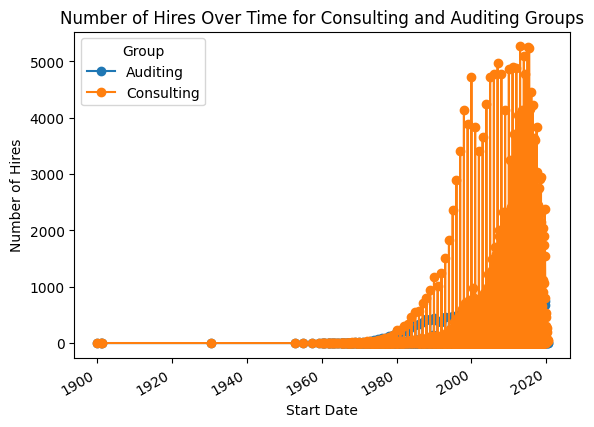

In [ ]:
# Now have the dataframe with the desired rows, plot the data.

# Convert 'start_date' to datetime
clean_df['start_dt'] = pd.to_datetime(clean_df['start_dt'])

# Group by 'Group' and 'start_dt', then count the number of hires for each group
grouped_df = clean_df.groupby(['Group', 'start_dt']).size().reset_index(name='count')

# Pivot the df to have 'Group' as columns
pivoted_df = grouped_df.pivot(index='start_dt', columns='Group', values='count').fillna(0)

# Plot the lines
pivoted_df.plot(kind='line', marker='o')

# Add labels and title
plt.xlabel('Start Date')
plt.ylabel('Number of Hires')
plt.title('Number of Hires Over Time for Consulting and Auditing Groups')

# Show the plot
plt.show()

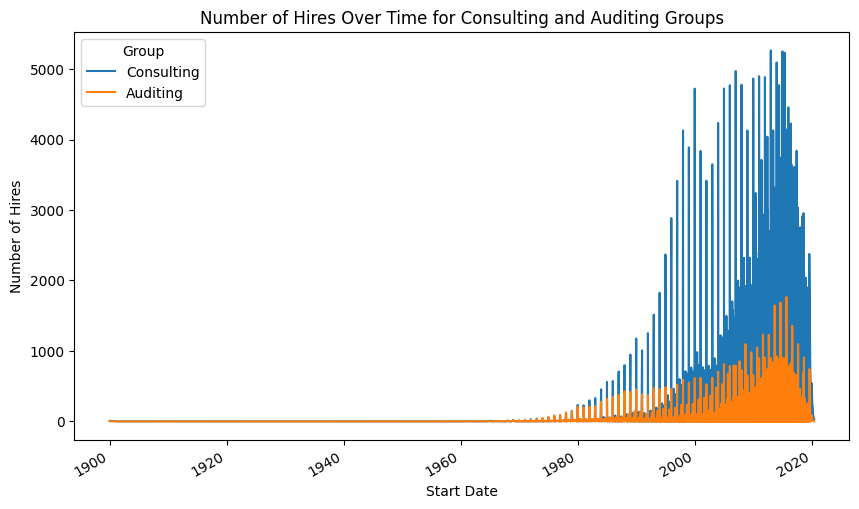

In [ ]:
# Hard to see the auditors line so fix the plot and make it larger.

# Increase the size of the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the lines
pivoted_df[['Consulting', 'Auditing']].plot(kind='line', ax=ax)

# Add labels and title
plt.xlabel('Start Date')
plt.ylabel('Number of Hires')
plt.title('Number of Hires Over Time for Consulting and Auditing Groups')

# Show the plot
plt.show()